## Import the Dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Position_Salaries.csv")
## in this dataset 'Position' is categorical and 'Level' looks like encoding of 'Position', so we drop 'Position'
X = df.iloc[:, 1:-1].values ##takes all col from 1 and except last
Y = df.iloc[:, -1].values

In [16]:
print (X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [17]:
Y = Y.reshape(len(Y), 1)
print (Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Handle Missing Values - there are no missing values

Handle categorical IVs - performing OneHotEncoding -- there are no categ IVs

## Feature Scaling
has to be done as there is no particular equation for SVR, hence there are no coeff to adjust acc to IV values. Implicit Eq is generated in SVR.



In [18]:
## in this dataset we apply feature scaling for Y('salary') as it is high range value and could dominate X('levels') and also we do it on X asusual
from sklearn.preprocessing import StandardScaler
## It is necessary to have diff StandardScaler obj for diff var
sc_X = StandardScaler()  ##this obj calc mean and std_dev for X
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()  ##this obj calc mean and std_dev for Y
##expects a 2D array, so reshape Y
Y = sc_Y.fit_transform(Y)

In [19]:
print (X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [20]:
print (Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Building SVR model with whole dataset

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') ##there are many kernels, here we use rbf
regressor.fit(X, Y)

C:\Users\Laddooo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predict 
remember to scale the values that you input for prediction using sc_X, 
also remember we have to reverse the scaling applied on Y :) using inverse_tranform() using sc_Y

In [22]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualizing SVR
be careful in applying sc_X and sc_Y inverse_transform()



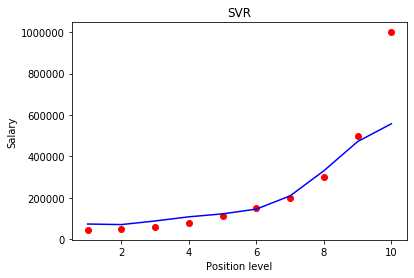

In [23]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

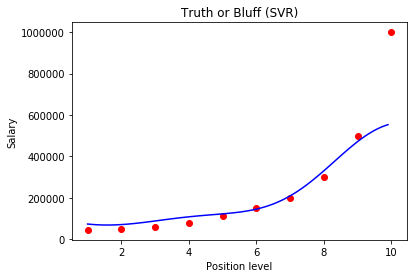

In [24]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Evaluating Model Performance

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined